In [1]:
from tifffile import imread
from matplotlib import pyplot as plt
import os
import numpy as np
from skimage.measure import find_contours

In [2]:
fpath = '/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene/output/2022-12-05-2D-segmentation-unstitched-tiles/2022-12-06-2D-segmentation'

### test

In [4]:
test = imread(os.path.join(fpath, 'nuclei', 'dapi_Position112.tiff'))

In [18]:
contours = []
for cell in range(np.amax(test)+1):
    a = find_contours(test == cell)
    if len(a):
        contours.append(a[0])

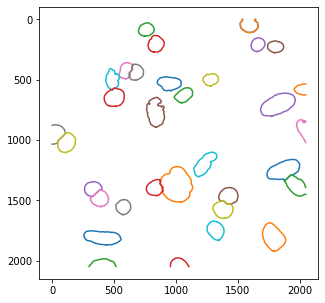

In [28]:
fig = plt.figure(figsize=(5,5))
for ct in contours:
    plt.plot(ct[:,1], ct[:,0])
plt.gca().invert_yaxis()
plt.savefig(os.path.join(fpath, 'dapi_Position112_contour.pdf'))

### process

In [3]:
tile_num = [112, 114, 123, 124, 136, 190, 202, 214, 226, 289, 290, 292, 303, 366, 378, 390, 454, 455, 478]

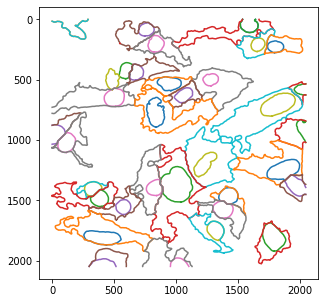

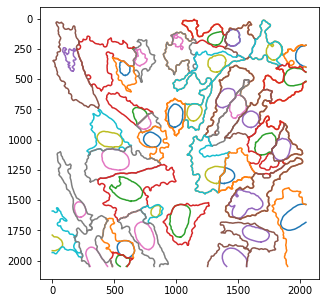

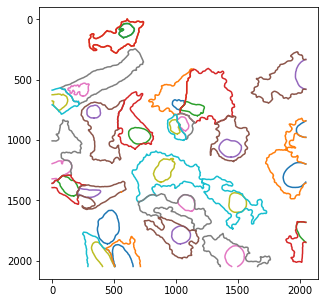

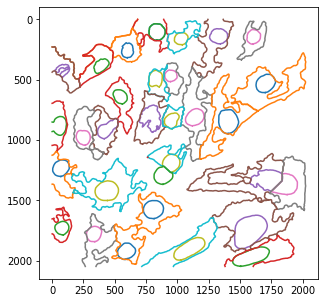

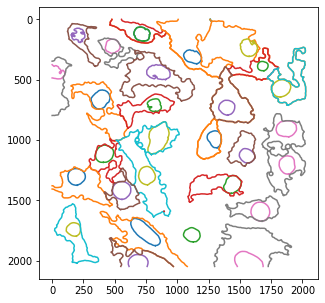

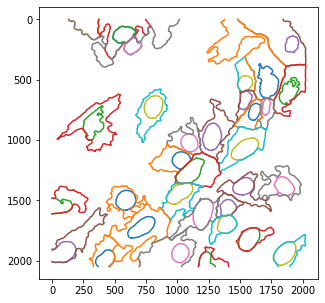

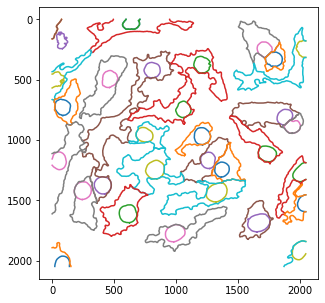

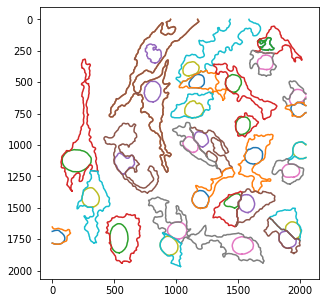

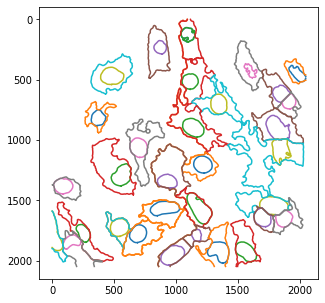

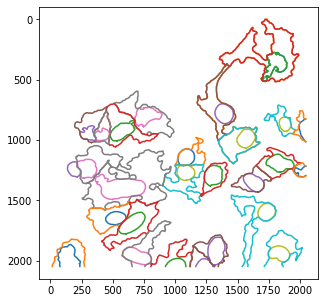

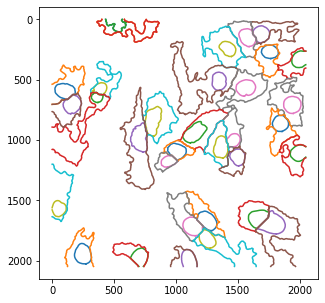

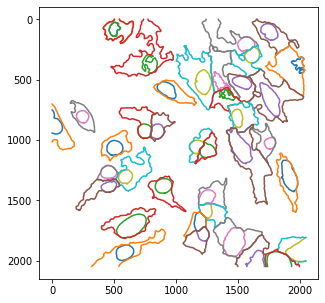

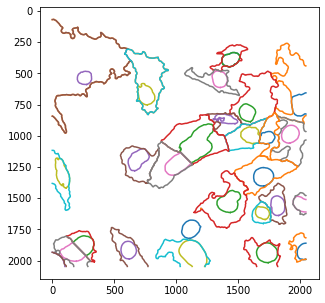

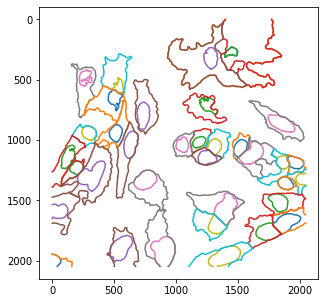

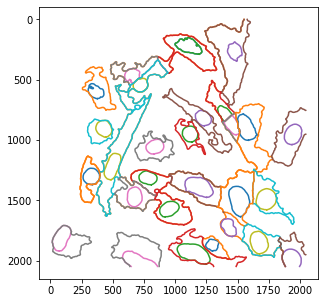

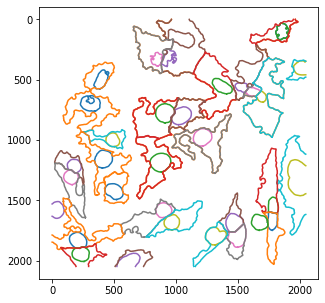

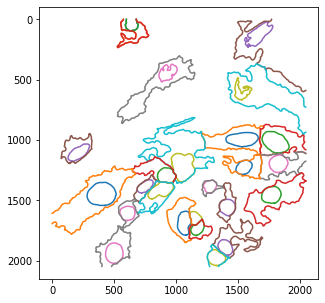

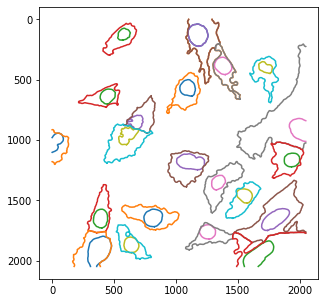

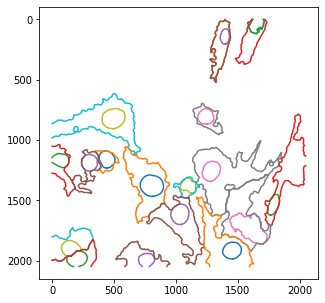

In [9]:
for tile in tile_num:
    nucl_seg = imread(os.path.join(fpath, 'nuclei', f'dapi_Position{tile}.tiff'))
    cell_seg = imread(os.path.join(fpath, 'cells', f'flamingoSUM_Position{tile}.tiff'))
    # nucleus contours
    nucl_contours = []
    for nucl in range(np.amax(nucl_seg)+1):
        a = find_contours(nucl_seg == nucl)
        if len(a):
            nucl_contours.append(a[0])
    # cell contours
    cell_contours = []
    for cell in range(np.amax(cell_seg)+1):
        a = find_contours(cell_seg == cell)
        if len(a):
            cell_contours.append(a[0])

    fig = plt.figure(figsize=(5,5))
    for i, ct in enumerate(nucl_contours):
        plt.plot(ct[:,1], ct[:,0])
        plt.plot(cell_contours[i][:,1], cell_contours[i][:,0])
    plt.gca().invert_yaxis()
    # break
    plt.savefig(os.path.join(fpath, f'Position{tile}_contour.pdf'))

### test

In [2]:
import cv2
im = cv2.imread('/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene/output/2022-12-05-2D-segmentation-unstitched-tiles/Cell_Segmented01.jpeg')

In [6]:
im.shape

(2048, 2048, 3)

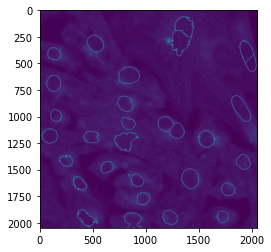

In [7]:
plt.imshow(im[:,:,0])

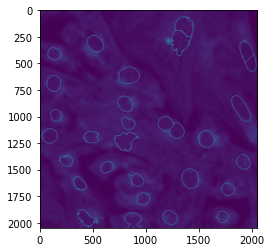

In [8]:
plt.imshow(im[:,:,1])

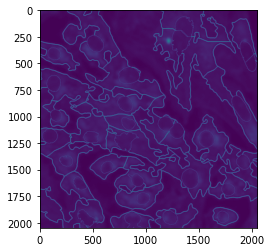

In [11]:
plt.imshow(im[:,:,2])
plt.savefig('/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene/output/2022-12-05-2D-segmentation-unstitched-tiles/Cell_Segmented01.pdf')